### Demonstrate usage of pyRipser

pyRipser is a python wrapper to the Ripser library for computing Vietoris-Rips persistence barcodes. 

For the library to work correctly, either "ripser" executable should be on the system path or the path to ripser has to be provided.

In [1]:
import numpy as np
from pyRipser import Ripser

#### Generate data for testing

We first generate a list of numpy arrays which will be our input distance matrices 

In [2]:
def generate_dist_matrix(n):
    # generate uniform random square matrix of size n
    mat = np.random.uniform(size=(n, n))
    
    # make it symmetric
    mat_symm = (mat + mat.T) / 2
    
    # set diagonal indices to 1
    diag_indices = np.arange(len(mat))
    mat_symm[diag_indices, diag_indices] = 1
    
    return mat_symm

distance_mat_size = 100
num_matrices = 20

data = [generate_dist_matrix(distance_mat_size) for i in range(num_matrices)]

#### Set up the Ripser instance
Presently the code requires the path to the `ripser` executable to be provided. The folder contains pre-built executables for Linux (Ubuntu 16.04) and Windows 10.

`Ripser` class takes two arguments - the path of the binary and the dimensions upto which the barcode is computed.

In [3]:
ripser = Ripser('./ripser', dim=1)
pers_diags = ripser.compute_pd(data)

#### Visualize the persistence diagram

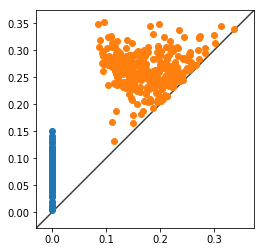

In [4]:
pers_diags[0].show_diagram()